In [14]:
# cell.py: Class for a cell in the Game of Life.
import drawSvg as draw

CELL_SIZE = 20      # width and height of each cell, in pixels

class Cell:
    # Initialize a new Cell.
    def __init__(self, row, column):
        self.living = False
        self.x = column * CELL_SIZE
        self.y = row * CELL_SIZE
        
    # Kill this Cell.
    def kill(self):
        self.living = False
        
    # Make this Cell be alive.
    def revive(self):
        self.living = True
        
    # If this Cell is alive, make it dead.
    # If it's dead, make it alive.
    def flip(self):
        self.living = not self.living
        
    # Return whether this Cell is alive.
    def is_living(self):
        return self.living
    
    # Have a Cell draw itself.
    def draw(self):
        if( self.living ):
            D.append(draw.Rectangle(self.x, self.y, CELL_SIZE, CELL_SIZE, fill='blue', stroke='black'))
        else:
            D.append(draw.Rectangle(self.x, self.y, CELL_SIZE, CELL_SIZE, fill='yellow', stroke='black'))

c1 is living =  False


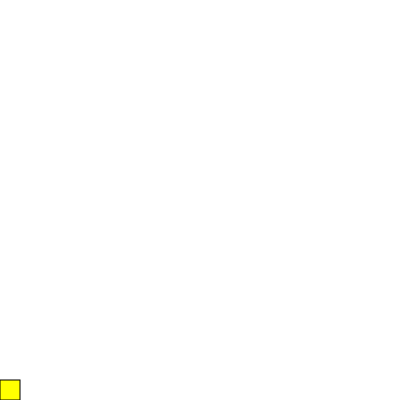

In [2]:
D = draw.Drawing(400, 400, origin=(0,0)) # define drawing canvas

c1 = Cell(0, 0)
c1.draw()
print("c1 is living = ", c1.is_living())
D

c1 is living =  True


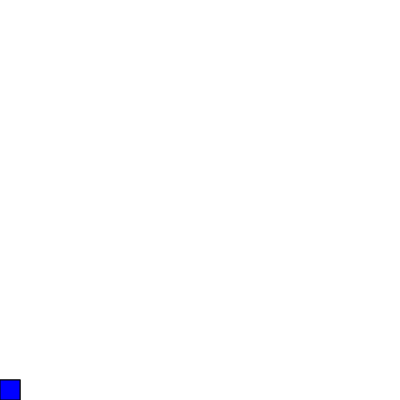

In [3]:
c1.flip()
c1.draw()
print("c1 is living = ", c1.is_living())
D

c1 is living =  False


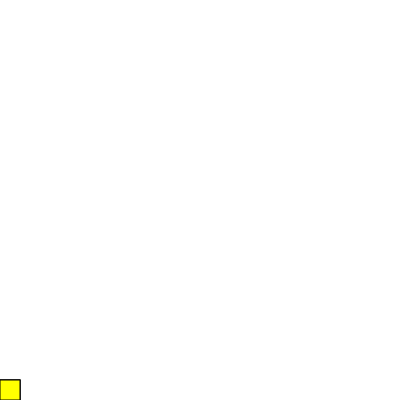

In [4]:
c1.flip()
c1.draw()
print("c1 is living = ", c1.is_living())
D

c2 is living =  False


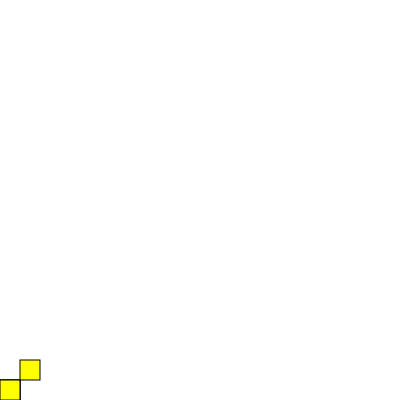

In [5]:
c2 = Cell(1, 1)
c2.draw()
print("c2 is living = ", c2.is_living())
D

c2 is living =  True


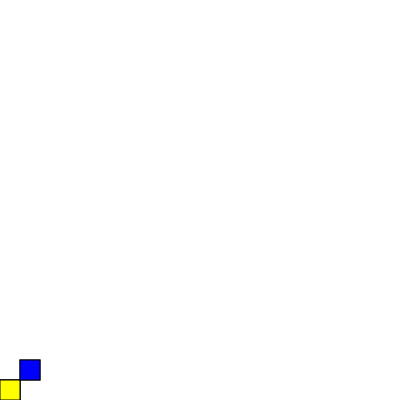

In [6]:
c2.revive()
c2.draw()
print("c2 is living = ", c2.is_living())
D

c2 is living =  False


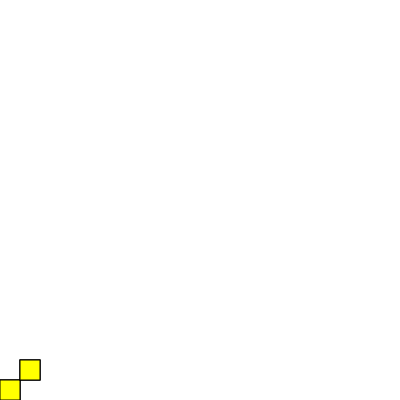

In [7]:
c2.kill()
c2.draw()
print("c2 is living = ", c2.is_living())
D

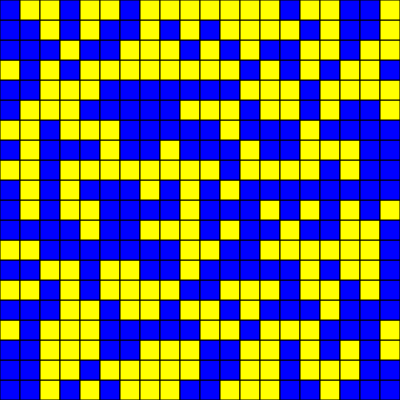

In [8]:
from random import uniform

for x in range(0,20):
    for y in range(0,20):
        c = Cell(x,y)
        if( uniform(0,1) < 0.5 ):
            c.revive()
        c.draw()
D

In [9]:
# colony.py: Class for a colony of cells in the Game of Life.
#
# A colony of cells undergoes generations.
# Each cell is either alive (blue) or dead (yellow).
# In each generation, count the number of living neighbors
# of each cell:
#    If 0 or 1, the cell dies of exposure.
#    If 4 or more, the cell dies of overcrowding.
#    If 3, the cell is revived.
#    If 2, the cell does not change.

class Colony:
    
    # Create a colony, with a given number of rows and columns.
    def __init__(self, rows, columns):
        # Remember the number of rows and columns.
        self.rows = rows
        self.columns = columns
        
        # Create cells as a reference to a list of references to rows.
        self.cells = []

        # Append each row.
        for row in range(rows):
            self.cells.append([])   # start with an empty row
            
            # Append each column to the row.
            for column in range(columns):
                self.cells[row].append(Cell(row, column))
                if( uniform(0,1) < 0.5 ):
                    self.cells[row][column].flip() # randomly make some cells alive
                
    # Draw a colony of cells.
    def draw(self):
        # Draw each row of cells.
        for row in range(self.rows):
            # Have each cell in this row draw itself.
            for column in range(self.columns):
                self.cells[row][column].draw()
            
    # Compute the next generation of cells.
    def compute_generation(self):
        # Initialize a list of lists of counts of living neighbors.
        living_neighbors = []
        for row in range(self.rows):
            living_neighbors.append([0] * self.columns)
            
        # Go through the entire colony, incrementing the living neighbor
        # count of each neighbor of each living cell.
        for row in range(self.rows):
            for column in range(self.columns):
                if self.cells[row][column].is_living():
                    # It's living, so increment.
                    row_above = (row-1) % self.rows
                    row_below = (row+1) % self.rows
                    column_left = (column-1) % self.columns
                    column_right = (column+1) % self.columns
                    living_neighbors[row_above][column_left] += 1
                    living_neighbors[row_above][column] += 1
                    living_neighbors[row_above][column_right] += 1
                    living_neighbors[row][column_left] += 1
                    living_neighbors[row][column_right] += 1
                    living_neighbors[row_below][column_left] += 1
                    living_neighbors[row_below][column] += 1
                    living_neighbors[row_below][column_right] += 1
                    
        # Now go back through the entire colony, killing cells with too few
        # or too many living neighbors, and making cells with 3 living neighbors
        # be alive.
        for row in range(self.rows):
            for column in range(self.columns):
                if (living_neighbors[row][column] <= 1) or \
                    (living_neighbors[row][column] >= 4):
                    self.cells[row][column].kill()
                elif living_neighbors[row][column] == 3:
                    self.cells[row][column].revive()

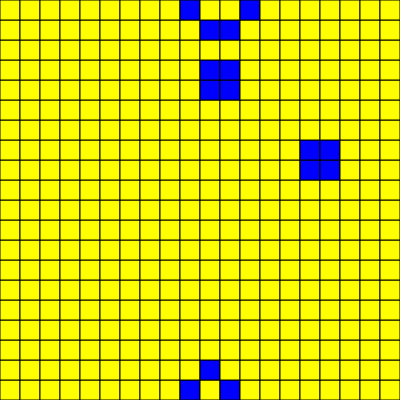

In [13]:
# Plays the Game of Life.
def draw_frame():
    hive.compute_generation()
    hive.draw()
    return D
        
hive = Colony(20,20) # build initial coloney

# go...
for i in range(0,100):
    D = draw.Drawing(400, 400, origin=(0,0)) # erase canvas

    with draw.animate_jupyter(draw_frame, delay=0.5) as anim:
        anim.draw_frame()